In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

In [2]:
train = pd.read_csv('csv/House_Price_Prediction_train.csv')

In [3]:
train.shape

(1460, 81)

## Treating Missing Values

In [4]:
cm = sns.light_palette("pink", as_cmap=True)
train.head(20).style.background_gradient(cmap=cm)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,nan,Attchd,1993.000000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,nan,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,nan,nan,nan,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,nan,nan,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,nan,nan,nan,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,nan,Reg,Lvl,AllPub,Corner,Gtl,B

In [5]:
isnull = train.isnull().sum().sort_values(ascending=False).to_frame()
isnull.columns = ['How_many']
isnull['precentage'] = np.around(((isnull / len(train) * 100)[(isnull / len(train) * 100) != 0]), decimals=2)
isnull[isnull.How_many > 0].style.background_gradient(cmap=cm)

,How_many,precentage
PoolQC,1453,99.520000
MiscFeature,1406,96.300000
Alley,1369,93.770000
Fence,1179,80.750000
FireplaceQu,690,47.260000
LotFrontage,259,17.740000
GarageYrBlt,81,5.550000
GarageCond,81,5.550000
GarageType,81,5.550000
GarageFinish,81,5.550000


### replace the null values in numeric columns with the mean of that column

#### LotFrontage column

In [6]:
train["LotFrontage"].isnull().sum()

259

In [7]:
train['LotFrontage'].fillna(int(train['LotFrontage'].mean()), inplace=True)

In [8]:
train["LotFrontage"].isnull().sum()

0

#### GarageYrBlt column

In [9]:
train["GarageYrBlt"].isnull().sum()

81

In [10]:
train['GarageYrBlt'].fillna(int(train['GarageYrBlt'].mean()), inplace=True)

In [11]:
train["GarageYrBlt"].isnull().sum()

0

### drop null values in the columns that has a total number of missing data > 5

In [12]:
number_of_missing = train.isnull().sum().sort_values()
percent_of_missing = ((train.isnull().sum() / train.isnull().count())*100).sort_values()
missing_train_df = pd.concat([number_of_missing,  percent_of_missing], keys = ['total number of missing data', 'total percent of missing data'], axis = 1)
train = train.drop((missing_train_df[missing_train_df['total number of missing data'] > 5]).index, axis = 1)
train.isnull().sum().sort_values(ascending = False)

Electrical      1
CentralAir      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
               ..
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
SalePrice       0
Length: 65, dtype: int64

### the columns that has <5 null values, we choose the most repeated value and fill the missing data with it

In [13]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [14]:
train['Electrical'].fillna(train['Electrical'].value_counts().index[0], inplace = True)

## which feature has the maximum correlation with the Sale Price of the house?

In [15]:
max = 0
x=0
for i in train.select_dtypes(include=np.number).drop(['SalePrice'],axis=1).columns:
    if (train[i].corr(train['SalePrice'])) > max:
        max = train[i].corr(train['SalePrice'])
        x = i
print("The column which has the maximum correlation with the SalePrice is: {0}" .format(x))

The column which has the maximum correlation with the SalePrice is: OverallQual


## Unique value in each columns

In [16]:
arr=[]
for i in train.columns:
    arr.append(len(train[i].value_counts()))
value_counts_df = pd.concat([pd.Series(train.columns), pd.Series(arr)], keys = ['column name', 'number of unique values in that column'], axis = 1)

value_counts_df

,column name,number of unique values in that column
0,Id,1460
1,MSSubClass,15
2,MSZoning,5
3,LotFrontage,110
4,LotArea,1073
...,...,...
60,MoSold,12
61,YrSold,5
62,SaleType,9
63,SaleCondition,6


In [17]:
value_counts_df.sort_values('number of unique values in that column').head(23)

,column name,number of unique values in that column
33,CentralAir,2
5,Street,2
8,Utilities,2
42,HalfBath,3
52,PavedDrive,3
40,BsmtHalfBath,3
10,LandSlope,3
45,KitchenQual,4
24,ExterQual,4
48,Fireplaces,4


## what is the relation between Overall material and finish quality, sale price depending on Overall condition rating?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


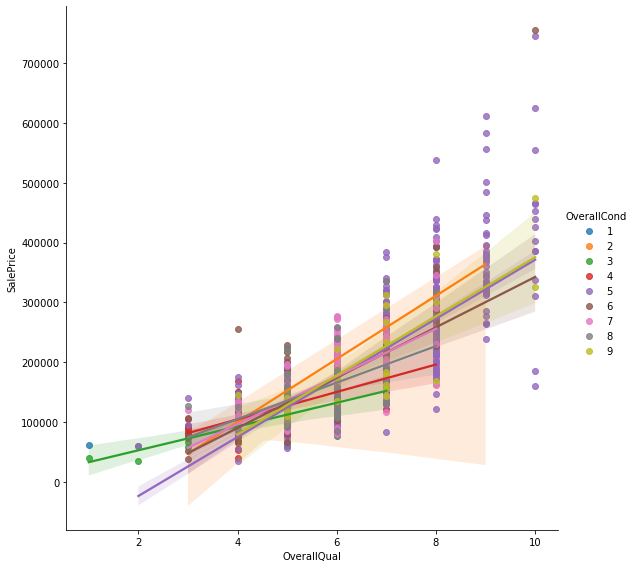

In [18]:
sns.lmplot(x='OverallQual', y='SalePrice', data=train ,hue='OverallCond',size=8)

## relation between grade (ground) living area square feet and Sale Price depending on general zoning

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


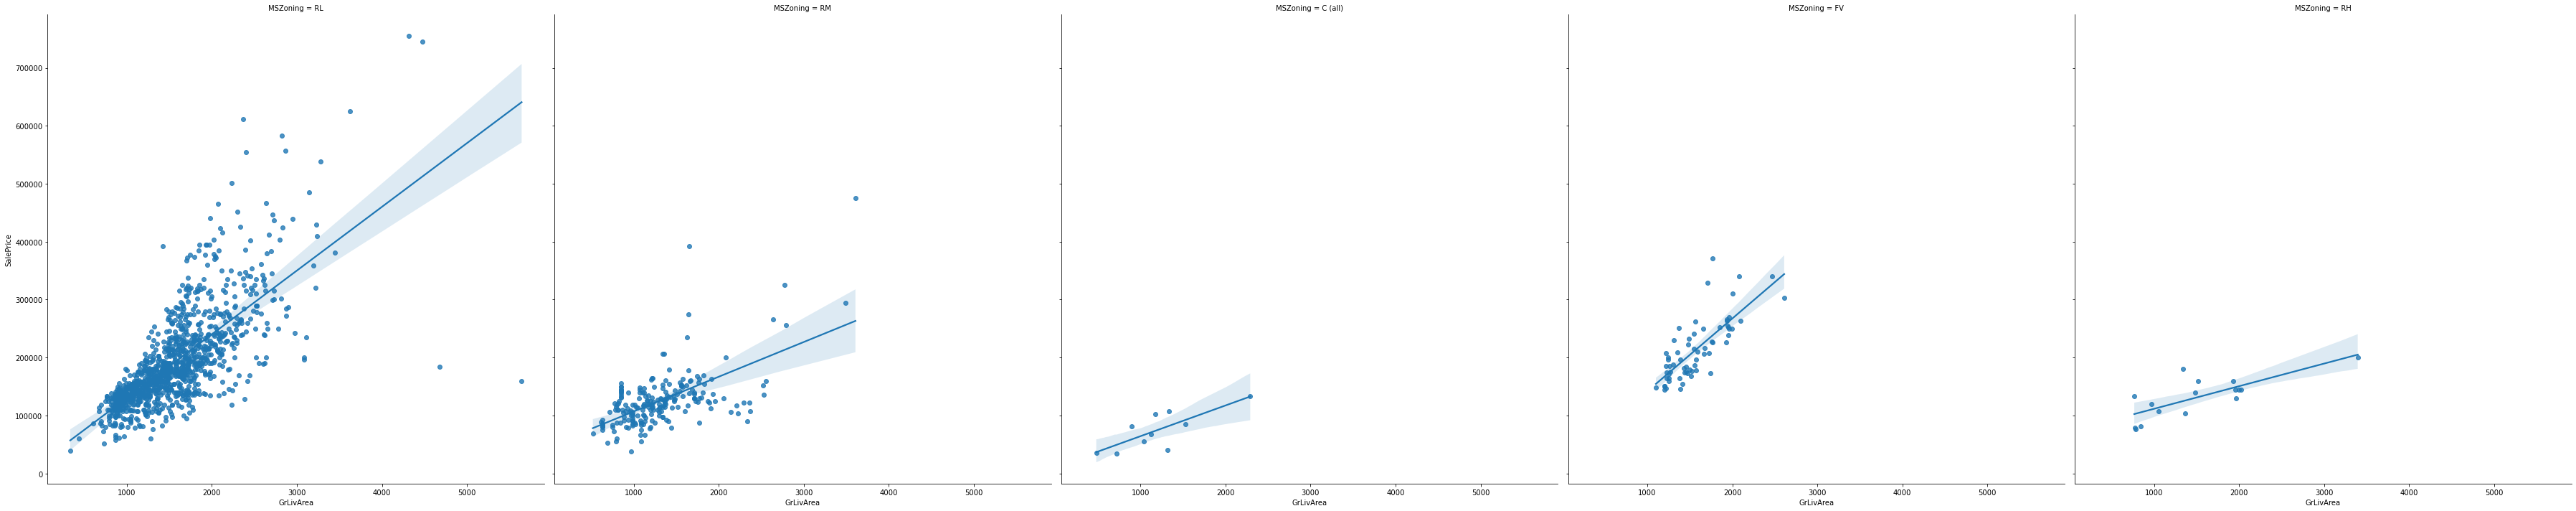

In [19]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=train,col='MSZoning',size=10)

# Univariate Analysis
### Numerical variables:

In [20]:
n_val = train.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
l=[]
for i in n_val:
  l.append(i)
print("Total no of numerical variables:",len(l))

Total no of numerical variables: 36


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


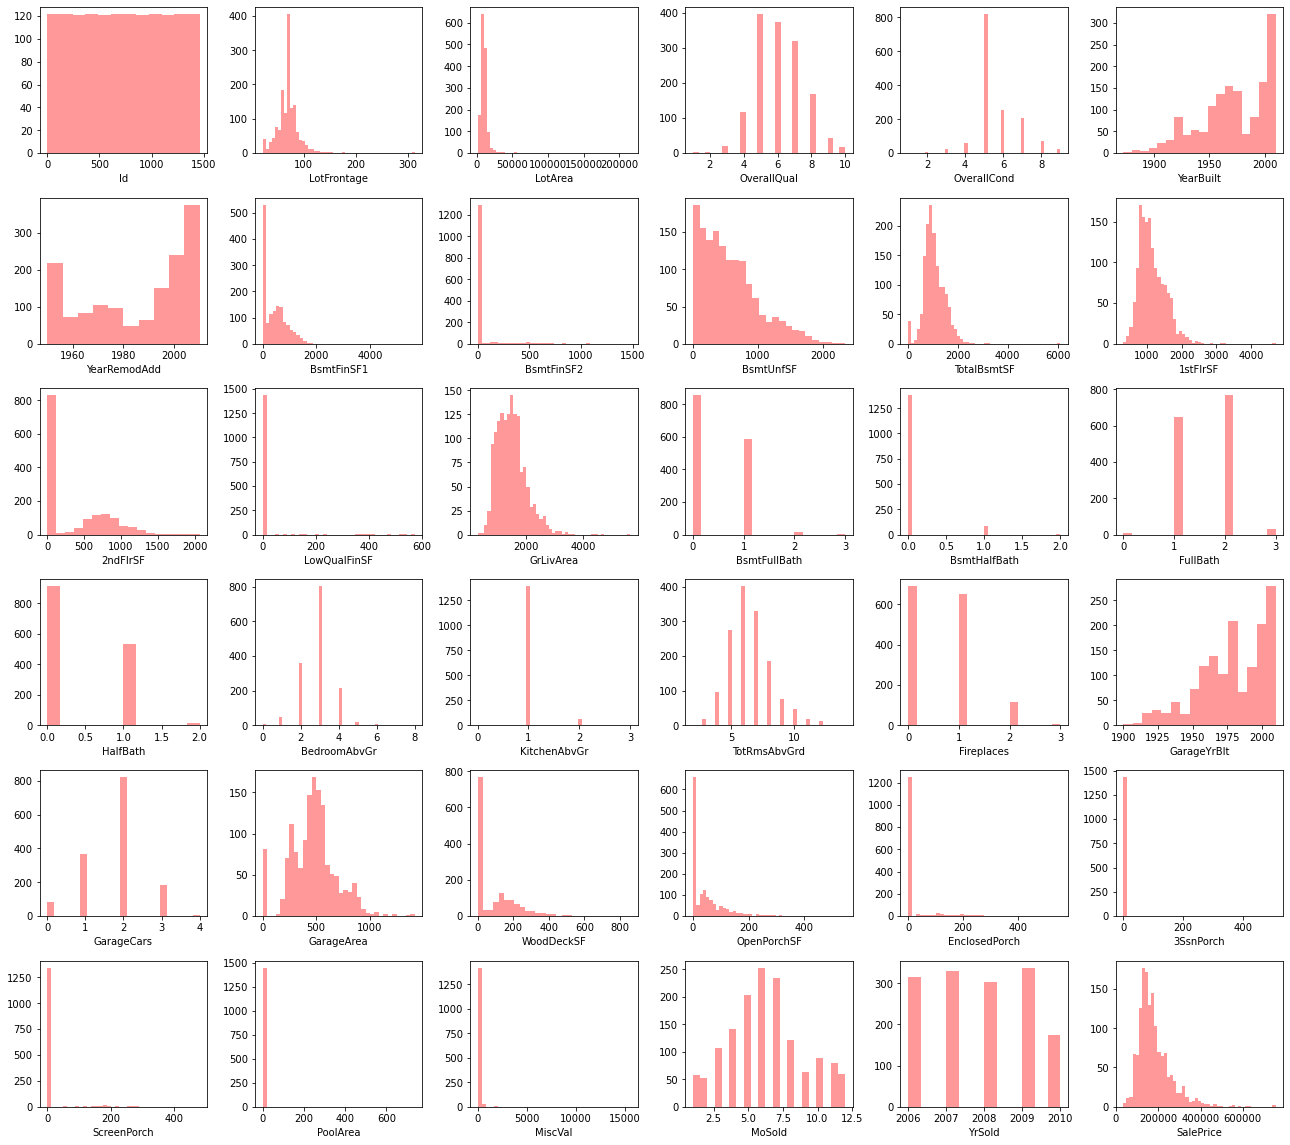

In [21]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(n_val):
    plt.subplot(6,6,index+1)
    sns.distplot(n_val.loc[:,col].dropna(), kde=False,color='r')
fig.tight_layout(pad=1.0)

- From the given plots we can tell that certain numerical variables have only one kind of value:
    - BsmtFitSF2
    - LowQualFinSF
    - BSMHalfBath
    - KitchenAbvGr
    - EnclosedPorch
    - 3snPorch
    - Screen Porch
    - PoolArea
    - MiscVal

## Categorical Variables

In [22]:
c_val = train.select_dtypes(include=['object']).copy()
c_val['MSSubClass'] = train['MSSubClass']
print(c_val.columns)
l=[]
for i in c_val:
  l.append(i)
print("Total no of categorical variables:",len(l))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')
Total no of categorical variables: 29


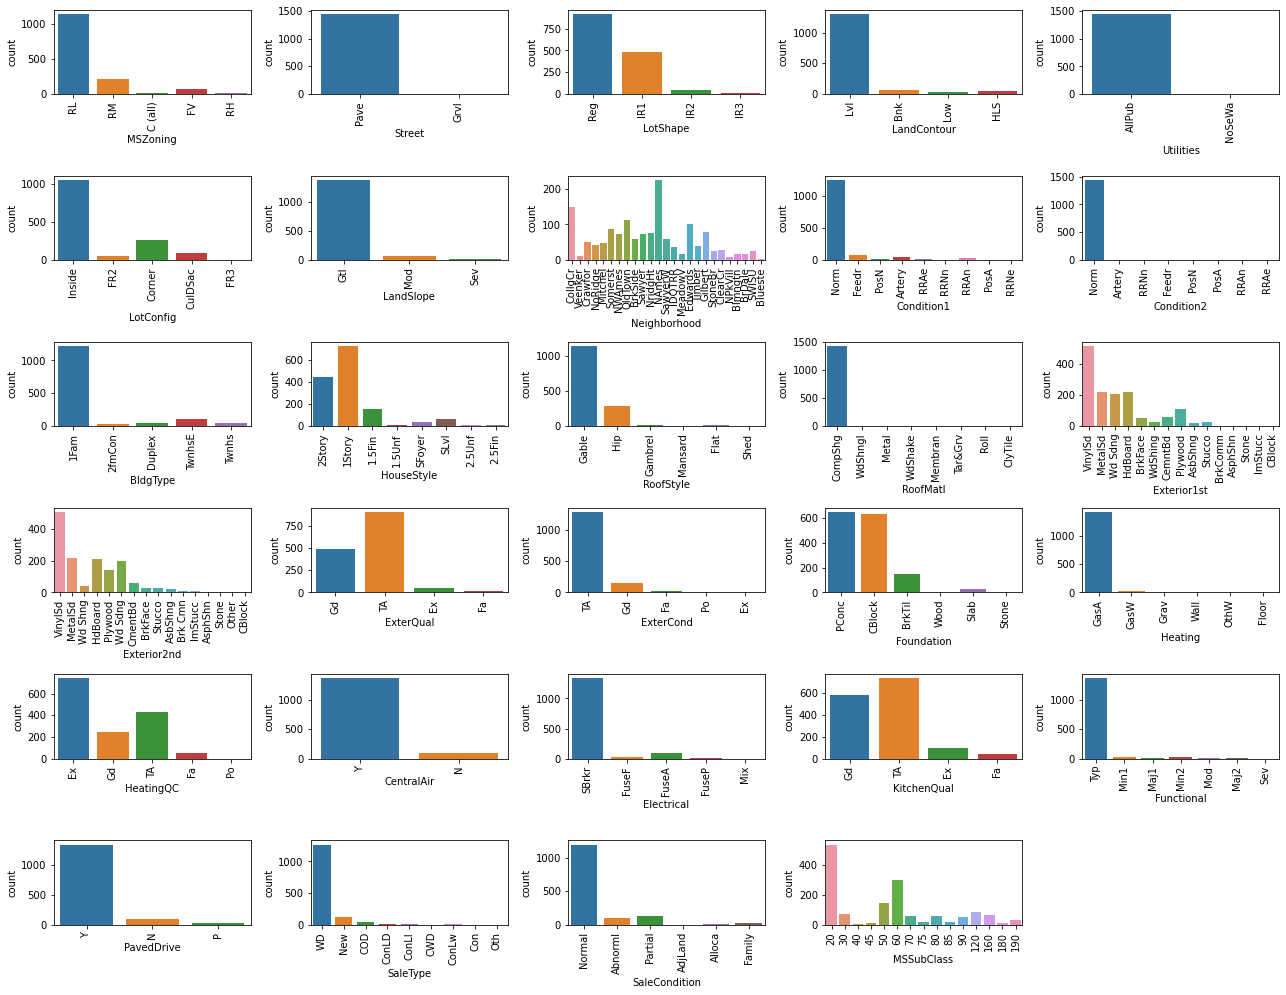

In [23]:
fig = plt.figure(figsize=(18,20))
for index in range(len(c_val.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=c_val.iloc[:,index], data=c_val.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.2)

- From the given plots we can tell that certain categorical features have only one kind of value:

    - Condition2
    - Street 
    - RoofMatl
    - Utilites
    - Heating

# Bivariate Analysis:

<AxesSubplot:>

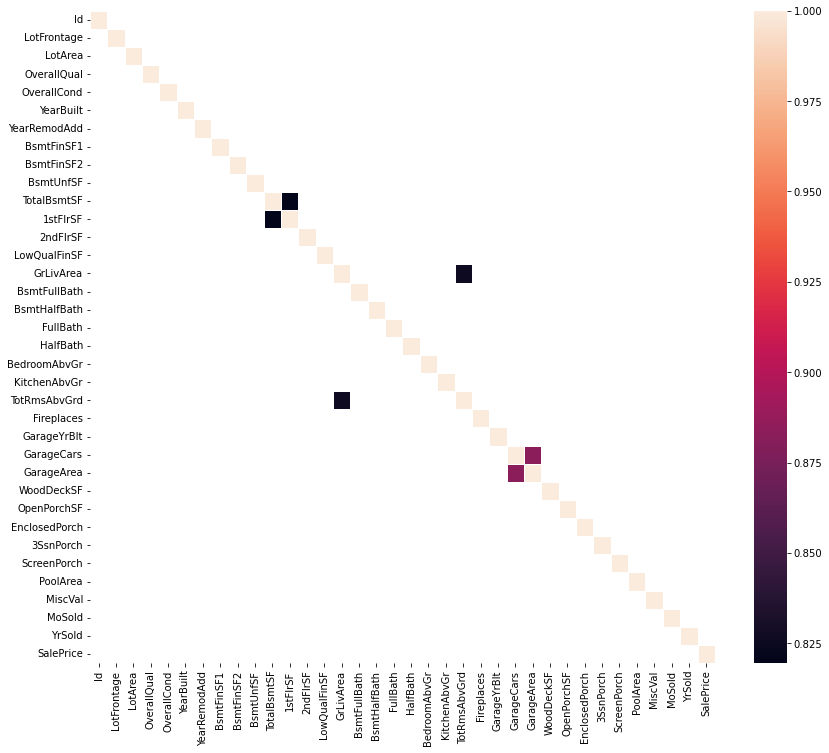

In [24]:
plt.figure(figsize=(14,12))
correlation = n_val.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5)

#### From the given correlation matrix we can infer the highly correlated features:
    - 1stfirSF AND TotalBsmtSf
    - TotRmsAbvGrd AND GrLivArea
    - GarageArea AND GarageCars

### We need to find the numerical features which have high correlation to the target variable 'SalePrice'

In [25]:
nfeatures_corr = n_val.corr()['SalePrice'][:-1]
# nfeatures_corr[abs(nfeatures_corr)>0.5]
high_fealist = nfeatures_corr[abs(nfeatures_corr)> 0.5].sort_values(ascending=False)
print("HIGHLY CORRELATED FEATURES:\n")
print(high_fealist)

HIGHLY CORRELATED FEATURES:

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


###  Finding the relation between the numerical features and the target variables:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


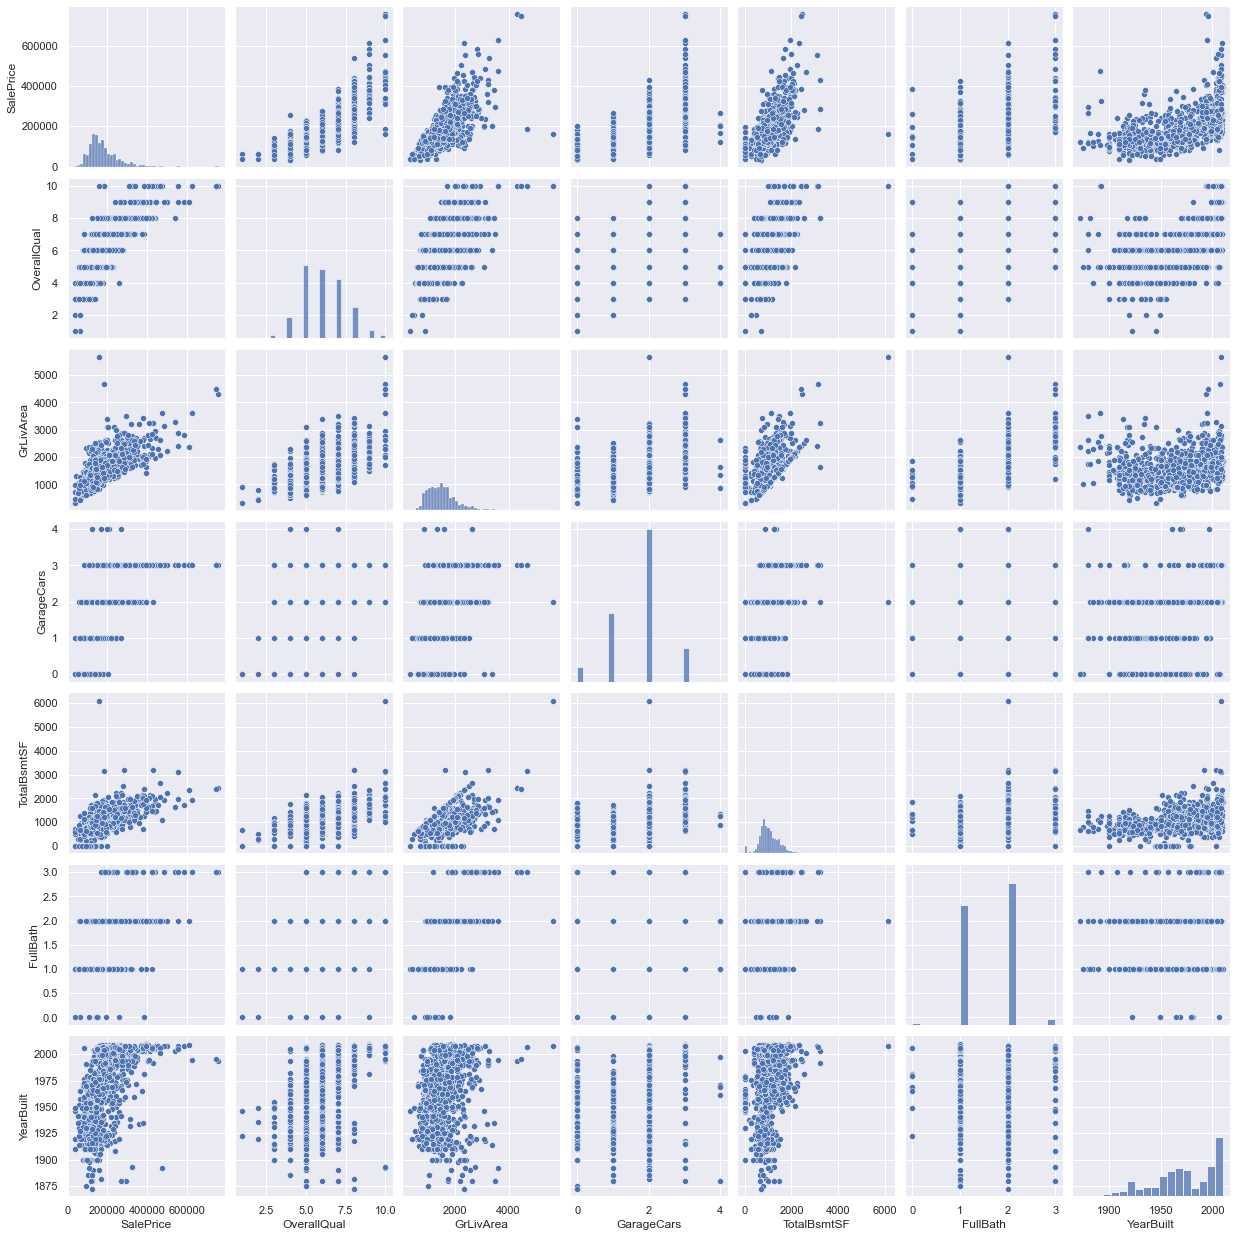

In [26]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();


In [27]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Id,0,0.0
CentralAir,0,0.0
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
LowQualFinSF,0,0.0
GrLivArea,0,0.0
BsmtFullBath,0,0.0
BsmtHalfBath,0,0.0
FullBath,0,0.0
HalfBath,0,0.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


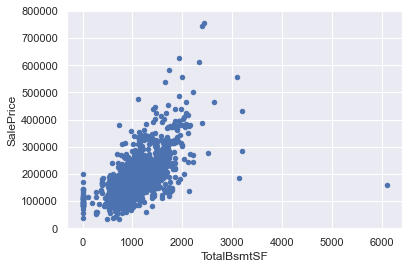

In [29]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


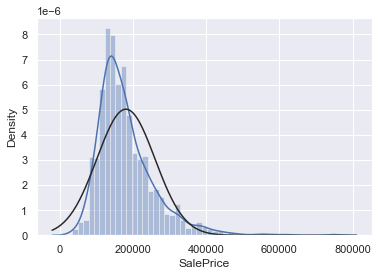

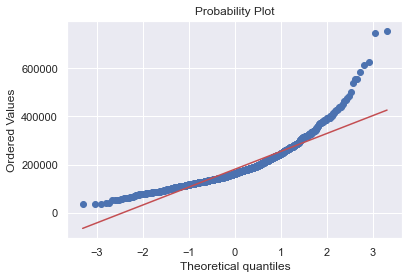

In [34]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)